In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=151表示前151行略過,\s+空白分隔
df = pd.read_table(u'K:\\HALO\\HALO-DB_dataset5887_release1_adlr_20180310a_1.ames',skiprows=151,sep="\s+")

#顯示前5行資料
df.head()

,TIME,IGI_RMSX,IGI_RMSY,IGI_RMSZ,IRS_ALT,IRS_ATA,IRS_AXB,IRS_AYB,IRS_AZB,IRS_AZG,...,U,V,W,WA,TS,RELHUM,SOURCE,WS,MIXRATIOV,MIXRATIO
0,27503.0,0.03,0.02,0.04,630.38,42.32,2.561,-1.541,-11.082,-11.215,...,1.95,5.66,0.46,199.01,286.34,41.9,3.0,5.99,6794.8,4.22
1,27504.0,0.03,0.02,0.04,632.32,42.13,2.683,-0.336,-11.900,-12.144,...,-0.19,2.79,0.33,176.14,285.65,44.4,3.0,2.80,6911.0,4.30
2,27505.0,0.03,0.02,0.04,636.16,42.07,2.506,0.034,-12.053,-12.289,...,-0.10,1.99,0.45,177.26,285.28,44.9,3.0,2.00,6831.2,4.25
3,27506.0,0.03,0.02,0.04,641.92,42.15,2.411,0.333,-11.070,-11.293,...,-0.37,2.64,0.22,172.09,285.08,44.0,3.0,2.67,6617.5,4.12
4,27507.0,0.03,0.02,0.04,649.12,42.26,2.277,-0.125,-10.557,-10.787,...,0.31,3.09,0.44,185.81,284.93,43.5,3.0,3.11,6473.9,4.03


In [6]:
df['IRS_LAT'].describe()

count    28451.000000
mean        34.647287
std          7.400969
min         24.212995
25%         26.343201
50%         35.660865
75%         41.874508
max         48.107209
Name: IRS_LAT, dtype: float64

In [8]:
%matplotlib inline 

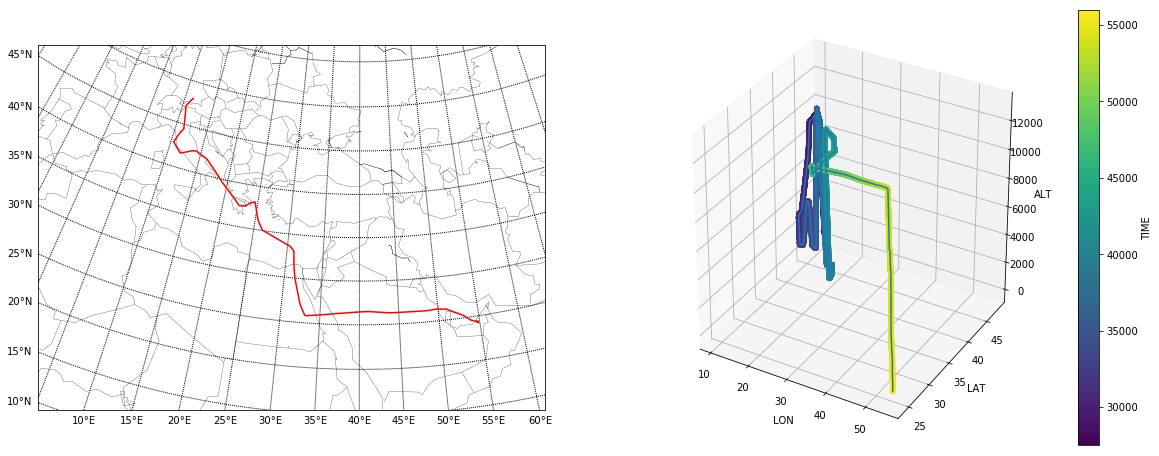

In [27]:
x = df['IRS_LON']
y = df['IRS_LAT']
t = df['TIME']
N = len(t)
z = df['IRS_ALT']
minLAT = y.min() - 15
maxLAT = y.max() + 5
minLON = x.min() - 5
maxLON = x.max() + 20
lat1 = minLAT + (maxLAT - minLAT) / 4.0 * 2.0
lat2 = minLAT + (maxLAT - minLAT) / 4.0 * 3.0
lon0 = (maxLON + minLON) / 2.0
#colors1 = plt.cm.jet(np.linspace(0,1,N))
colors2 = plt.cm.Reds(np.linspace(0,1,N))
fig = plt.figure(figsize=(20,8))
# First subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.m = Basemap(llcrnrlon=minLON, llcrnrlat=minLAT, urcrnrlon=maxLON, urcrnrlat=maxLAT, projection='lcc', lat_1=lat1, lat_2=lat2, lon_0=lon0)
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
# 绘制经纬线
ax1.m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
ax1.m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)

#ax1.m.fillcontinents(color='black',lake_color='white')
# 填充大陆, 大陆颜色为珊瑚色， 湖泊颜色为水色
#ax1.m.drawmapboundary(fill_color='white')
# 画出地图边界，海洋区域颜色为水色
ax1.m.drawcoastlines(linewidth=0.25)
# 画出海岸线（描边）
ax1.m.drawcountries(linewidth=0.25)
# 画出国境线（描边）


lons = list(x)
lats = list(y)
data = df.iloc[:,2]

x1, y1 = ax1.m(lons, lats) # Convert coords to projected place in figure
ax1.m.plot(x1, y1, c='Red')
#ax1.m.scatter(x1, y1, c=colors2)

# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z)
p2 = ax2.scatter(x, y, z, c = t)
ax2.set_xlabel('LON')
ax2.set_ylabel('LAT')
ax2.set_zlabel('ALT')
fig.colorbar(p2, label = 'TIME')

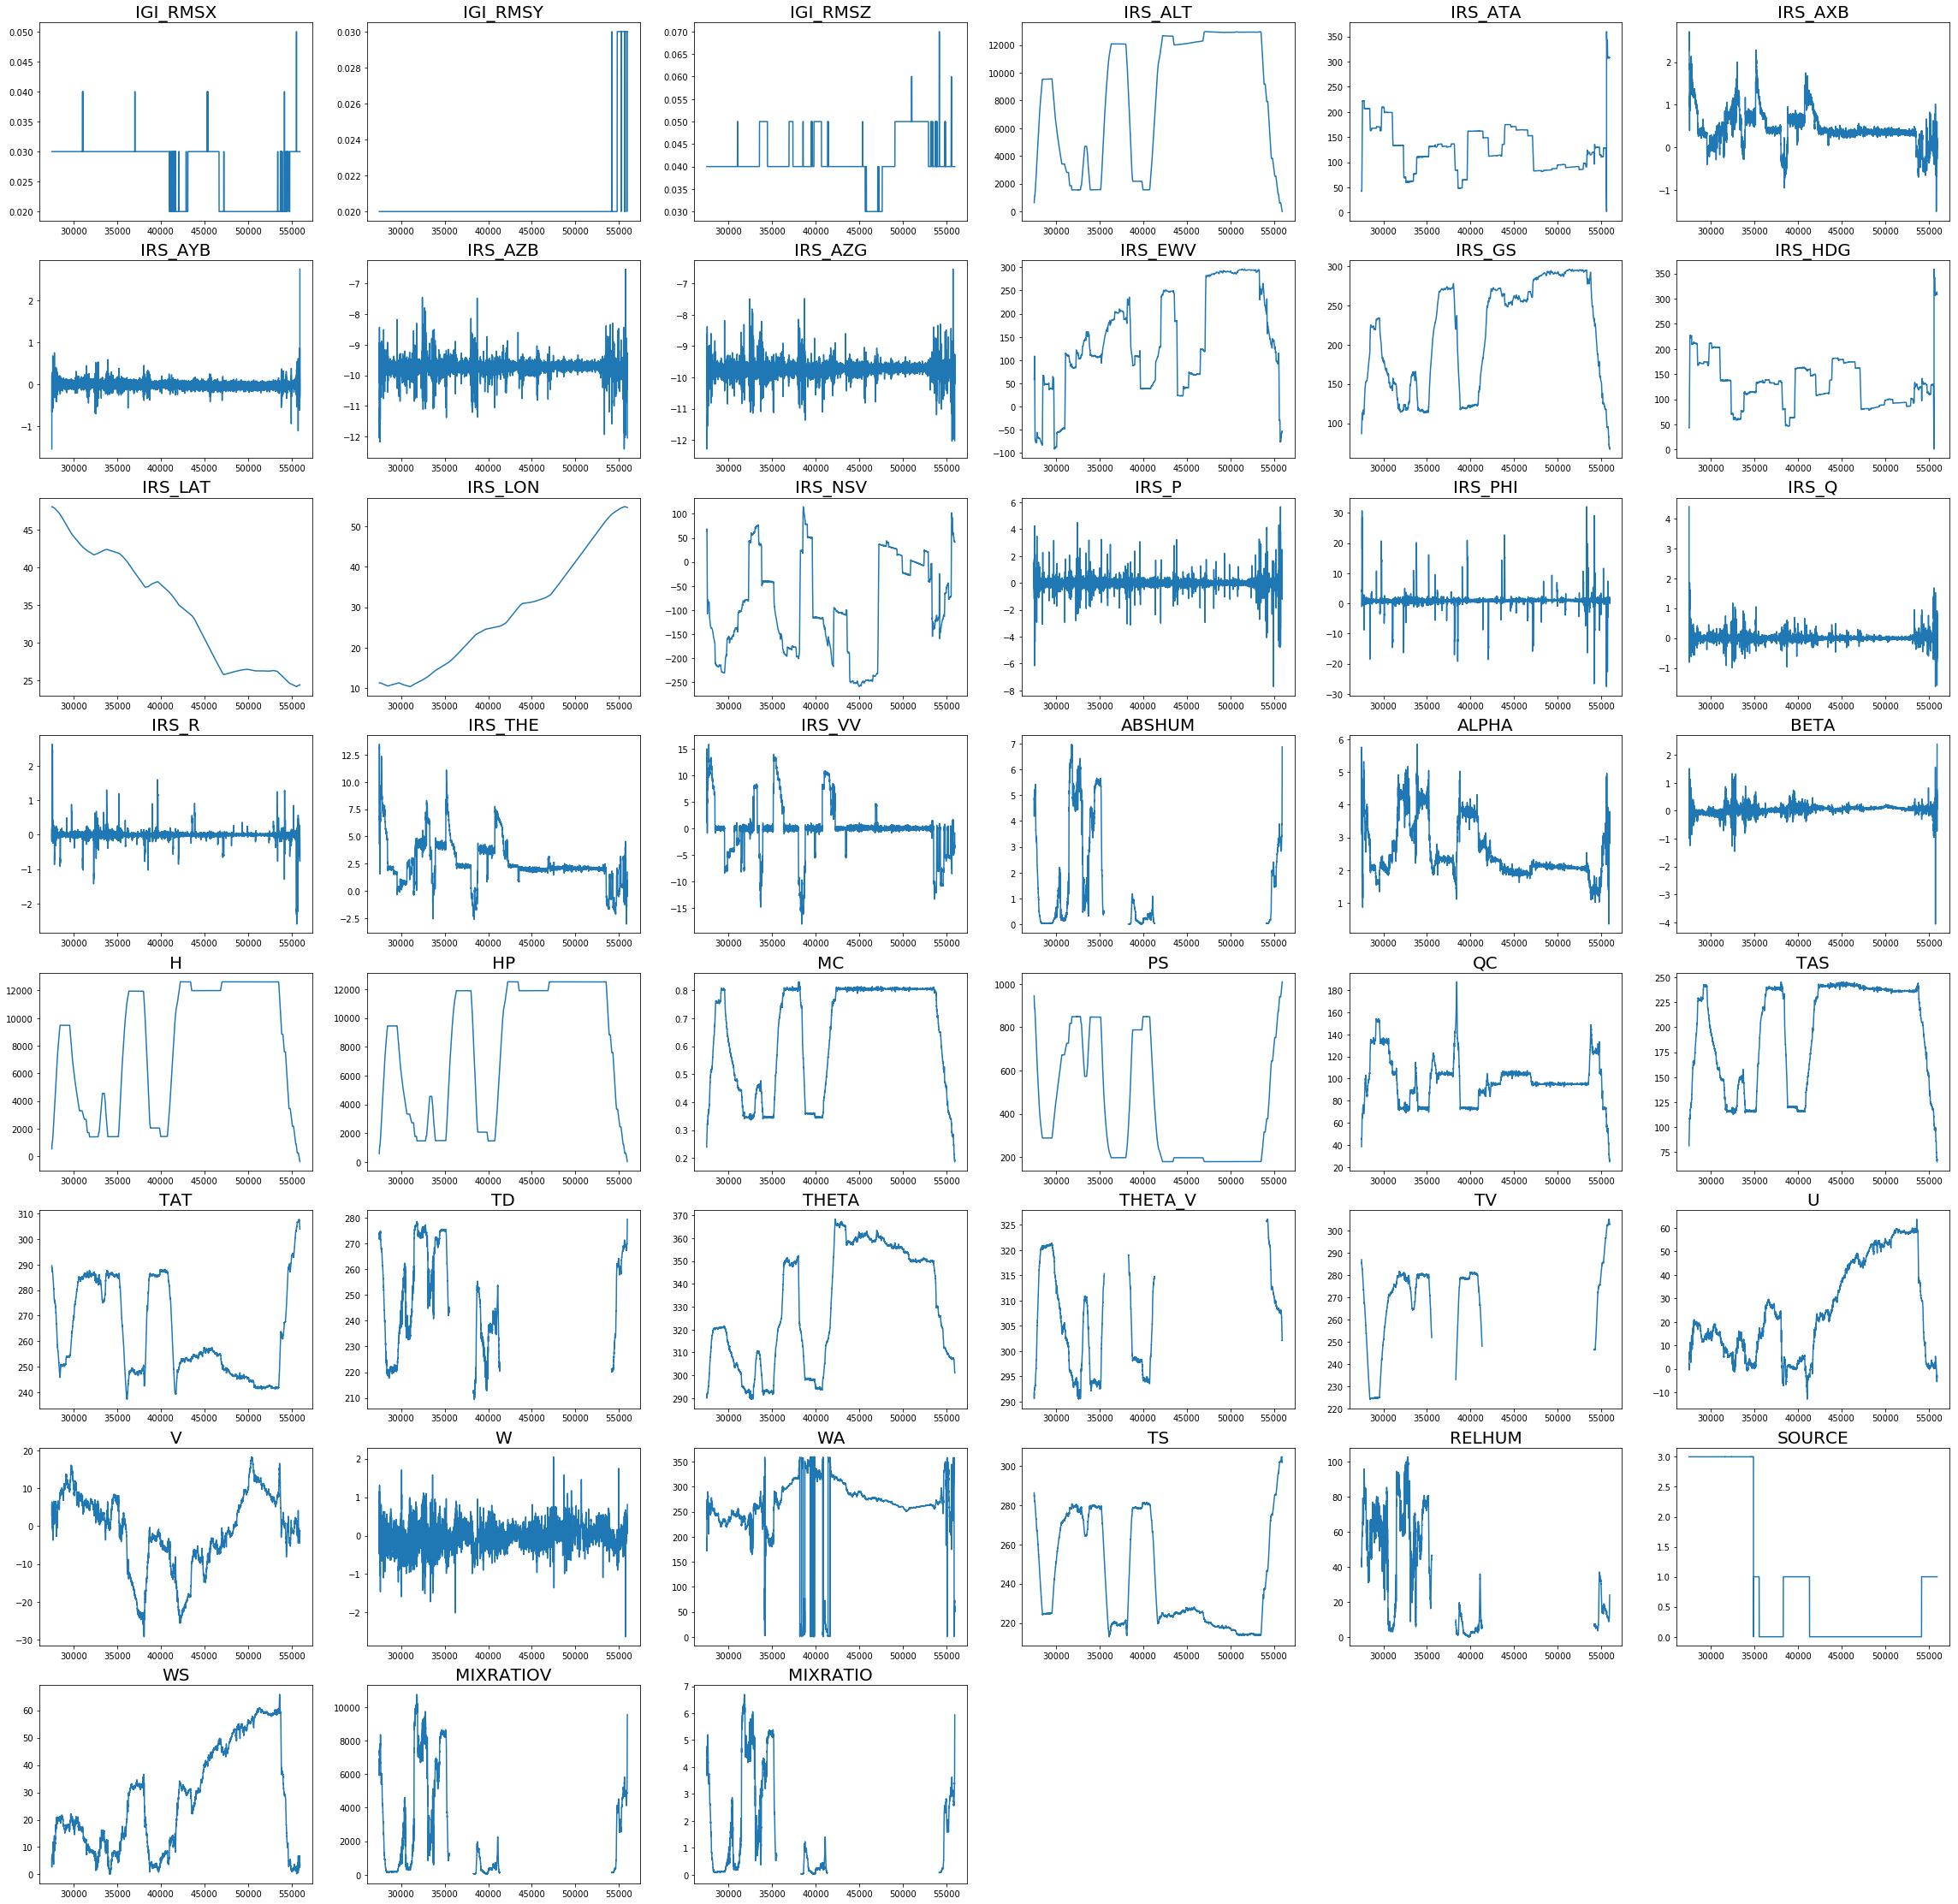

In [31]:
fig = plt.figure(figsize=(40,40))

# mark missing values as NaN
df = df.replace(-9900.0, np.NaN)

for i in range(45):
    ax1 = fig.add_subplot(8, 6, i+1)
    ax1.plot(t, df.iloc[:,i+1])
    plt.xscale('linear')
    plt.yscale('linear')
    ax1.tick_params(axis='x', which='major', labelsize=10)
    ax1.tick_params(axis='y', which='major', labelsize=10)
    ax1.set_title(df.columns.values[i+1], fontsize=20)